### 1. Load Libraries

In [1]:
# Data manipulation libraries
import pandas as pd
import numpy as np

##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

### 2. Load Data

In [2]:
# Load data
df = pd.read_csv("Travel_insurance.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


### 3. Preprocessing of Data

In [3]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [4]:
df.describe()

,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


### min age is= 25 and max age = 35 
### family members min= 2  max= 9

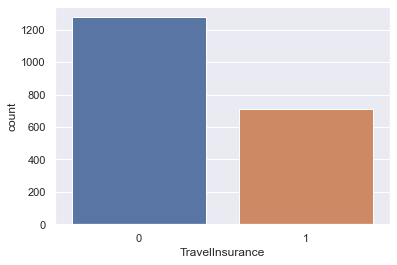

In [6]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='TravelInsurance')
plt.show()

### Near about 700 peoples taken insurance out of 1986

In [8]:
df.EverTravelledAbroad.unique()##cheching uniqness

array(['No', 'Yes'], dtype=object)

In [9]:
df.FrequentFlyer.unique()##cheching uniqness

array(['No', 'Yes'], dtype=object)

In [10]:
df.GraduateOrNot.unique()##cheching uniqness

array(['Yes', 'No'], dtype=object)

## In data we can see that FrequentFlyer, EverTravelledAbroad & GraduateOrNot columns having yes or no for proper results will convert it into yes=1 and no=0
## simillarly for Employment Type column will convert graduate= 1 and non-graduate=0

In [11]:
#function for converting yes or no

def clean_string(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [12]:
#function for employment
def employment(x):
    if x == 'Government Sector':
        return 1
    else:
        return 0

In [13]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [14]:
df_clean = df
df_clean['GraduateOrNot'] = df_clean['GraduateOrNot'].apply(clean_string)
df_clean['FrequentFlyer'] = df_clean['FrequentFlyer'].apply(clean_string)
df_clean['EverTravelledAbroad'] = df_clean['EverTravelledAbroad'].apply(clean_string)
df_clean['Employment Type'] = df_clean['Employment Type'].apply(employment)

In [15]:
df_clean

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,0,1,1500000,4,0,1,1,1
1983,1983,28,0,1,1750000,5,1,0,1,0
1984,1984,28,0,1,1150000,6,1,0,0,0
1985,1985,34,0,1,1000000,6,0,1,1,1


### 4. Visualize Data

<AxesSubplot:>

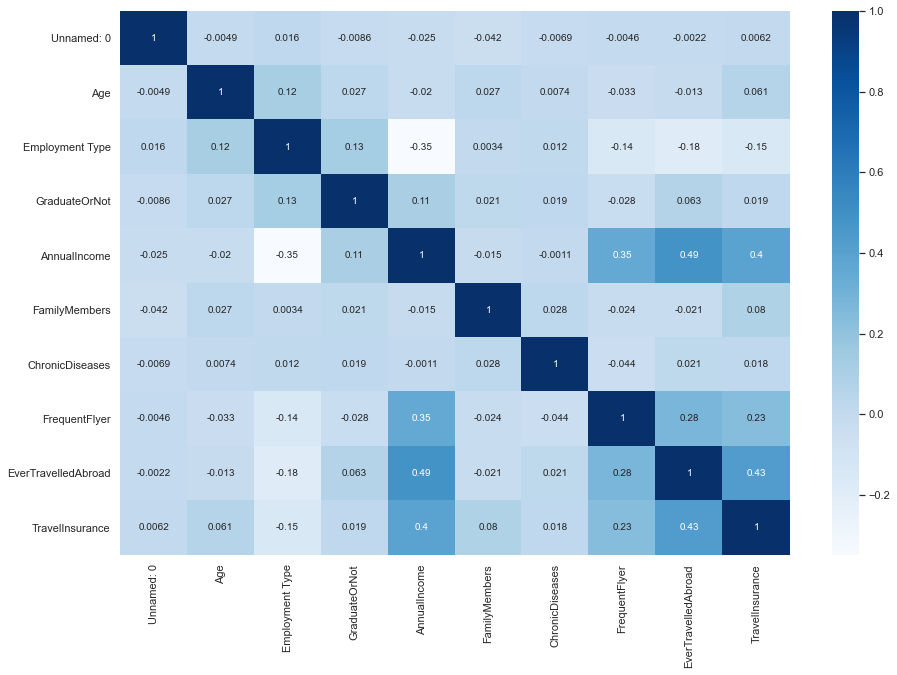

In [16]:
## correlation will give relation between each variable
correlation = df_clean.corr()
plt.figure(figsize=(15,10) )
sns.heatmap(correlation,annot = True,cmap = 'Blues')

### from above plot we can say that for travel insurance EverTravelledAbroad impact more which is +0.43, annual income +0.4 and FrequentFlyer +0.23 

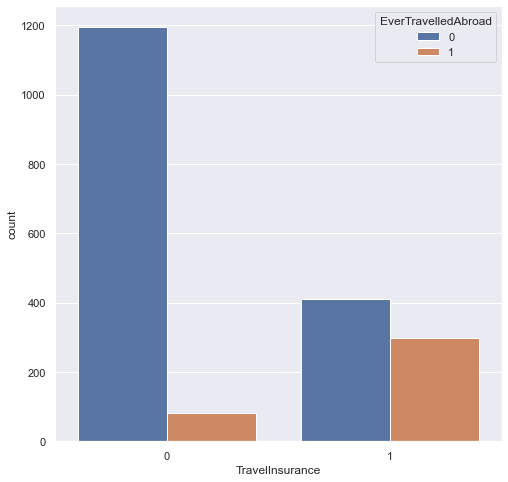

In [17]:

fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='EverTravelledAbroad',x='TravelInsurance',data=df)
plt.show()

## from above plot we can see that those who not travel abroad yet they have not taken insurance

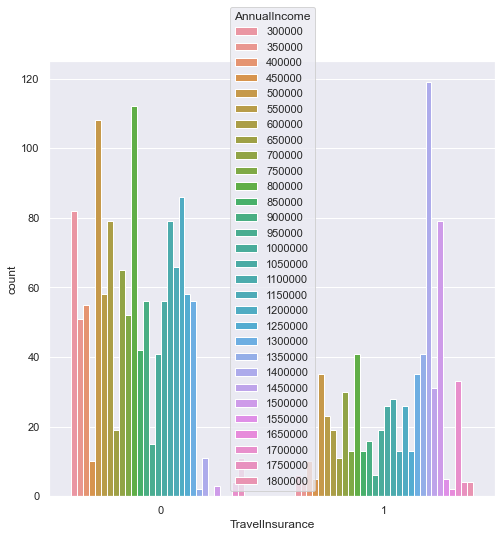

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='AnnualIncome',x='TravelInsurance',data=df)
plt.show()

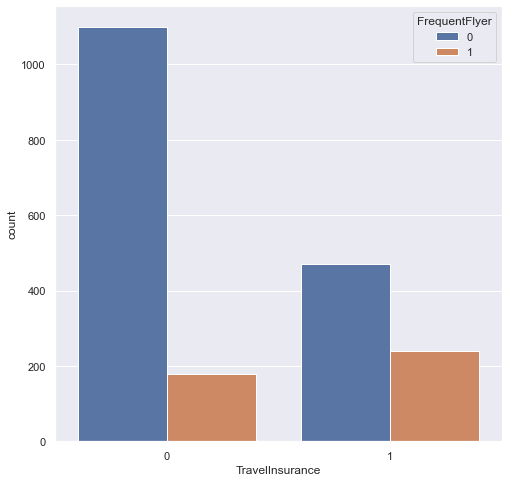

In [20]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='FrequentFlyer',x='TravelInsurance',data=df)
plt.show()

## from above plot we can say that those people who are travelling by plane frequently they mostly take insurance 

In [22]:
df_clean.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0


In [23]:
df_drop = df_clean.drop("Unnamed: 0",axis=1) ## dropping 1st column which dont have any relation in data

In [24]:
df_drop.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


### 5. Split Data in Training & Testing samples

In [25]:
df_drop.TravelInsurance.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [26]:
x = df_drop.iloc[:,:-1]
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [27]:
y = df_drop['TravelInsurance']
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: TravelInsurance, dtype: int64

## From above data we can see that it is in different units so if we pass same data our model will not give better accuracy
## To convert all data in same format will use standard scaler method

In [29]:
standard = StandardScaler()
std_x = standard.fit_transform(x)

### 5. Split Data 

In [30]:
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.20, random_state= 20)

print("Training data:{}".format(x_train.shape))
print("Test data:{}".format(x_test.shape))

Training data:(1589, 8)
Test data:(398, 8)


In [31]:
results = []

### 6. Build Logistic Regression Model

In [32]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score = clf.score(x_test, y_test)

In [33]:
# Model diagnostic
print(score)
print(y_predicted)

0.7738693467336684
[0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]


In [34]:
print("Predicted_value","true_vale")
for i,j in zip(y_predicted, y_test):
    print(i,j)

Predicted_value true_vale
0 0
0 0
1 1
0 0
0 0
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 1
0 1
1 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 0
0 0
0 0
0 1
1 1
0 0
0 0
0 1
1 1
0 1
0 0
0 0
1 0
0 1
0 0
0 0
0 1
0 0
1 1
0 1
0 0
1 1
1 1
0 1
0 0
0 0
0 0
1 1
1 0
0 1
0 1
0 1
0 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 1
1 0
0 0
0 0
1 1
1 1
0 1
0 1
1 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 0
0 0
1 1
0 1
1 1
1 1
0 0
0 0
0 0
0 1
0 0
1 1
0 0
1 1
0 1
0 1
0 0
0 0
0 1
1 0
1 1
0 0
0 0
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
1 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
1 1
0 1
0 0
0 1
0 1
0 1
0 0
0 0
1 0
1 1
0 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 1
0 1
0 0
0 1
0 1
0 0
0 1
1 1
0 0
0 0
0 1
0 1
1 1
1 1
0 0
0 0
1 0
0 1
1 1
0 0
1 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
1 1
0 1
0 1
0 0
0 1
0 0
0 0
0 0
0 

##  7. using MinMax Scalar to preprocess data

In [35]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(x)

In [36]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [37]:
X_minmax

array([[0.6, 1. , 1. , ..., 1. , 0. , 0. ],
       [0.6, 0. , 1. , ..., 0. , 0. , 0. ],
       [0.9, 0. , 1. , ..., 1. , 0. , 0. ],
       ...,
       [0.3, 0. , 1. , ..., 1. , 0. , 0. ],
       [0.9, 0. , 1. , ..., 0. , 1. , 1. ],
       [0.9, 0. , 1. , ..., 0. , 0. , 0. ]])

In [38]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(X_minmax,y,test_size=0.20,
                                                    random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(1589, 8)
Shape of Test Xs:(398, 8)
Shape of Training y:(1589,)
Shape of Test y:(398,)


In [39]:
# Build Model
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test);#testing the linear regression model

In [40]:
# Model diagnostic
print(score)
print(y_predicted)

0.7688442211055276
[0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]


### 8. confusion matrix

In [41]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[232,  16],
       [ 76,  74]], dtype=int64)

In [42]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [43]:
classes = df['TravelInsurance'].value_counts()

Confusion matrix, without normalization
[[232  16]
 [ 76  74]]
Normalized confusion matrix
[[0.94 0.06]
 [0.51 0.49]]


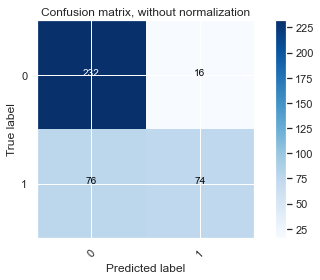

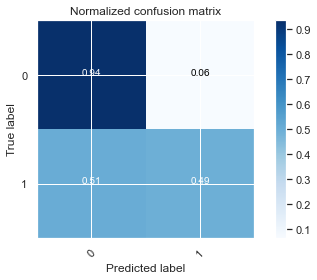

In [44]:
#With Normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes.index,
                      title='Confusion matrix, without normalization')
# With normalization
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= classes.index, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### 9. solving with decision tree classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf_1 = DecisionTreeClassifier(criterion = 'entropy')



clf_1.fit(x_train,y_train)
y_predicted = clf_1.predict(x_test)
score = clf_1.score(x_test,y_test)


print(score)
results.append(score)

0.7537688442211056


In [47]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[208,  40],
       [ 58,  92]], dtype=int64)

#### 10. random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Build Model
clf = RandomForestClassifier(criterion= "entropy",bootstrap = False,n_estimators = 1000,n_jobs = 2,verbose = 1,max_features =3)
clf.fit(x_train, y_train)
y_predicted = clf.predict(x_test)
score=clf.score(x_test,y_test)
results.append(score)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Paral

In [50]:
print(score)

0.7763819095477387


### Conclusion : 

## Logistic Regression = 0.7688442211055276
## Decision tree = 0.7537688442211056
## Random forest = 0.7763819095477387
## in this problem random forest gives best accuracy which is 77%